# Temoa Simulation Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from data_parser import get_output_files, make_capacity_plots, make_emissions_plots
from data_parser import get_scenario_name, parse_datalines, create_dataframe, create_column
from data_parser import data_by_tech, data_by_variable, data_by_year
from data_parser import variables, time_horizon, get_total

## Business As Usual

* Nuclear reactors shutdown at the end of their current licenses.
* There is no constraint on carbon or other greenhouse gas emissions.

In [2]:
file_list = get_output_files()
file_list

['./data_files/BAU_IL_bau_model/bau_OutputLog.log',
 './data_files/SD2_IL_SD2_model/SD2_OutputLog.log',
 './data_files/SD4_IL_SD4_model/SD4_OutputLog.log',
 './data_files/SD3_IL_SD3_model/SD3_OutputLog.log']

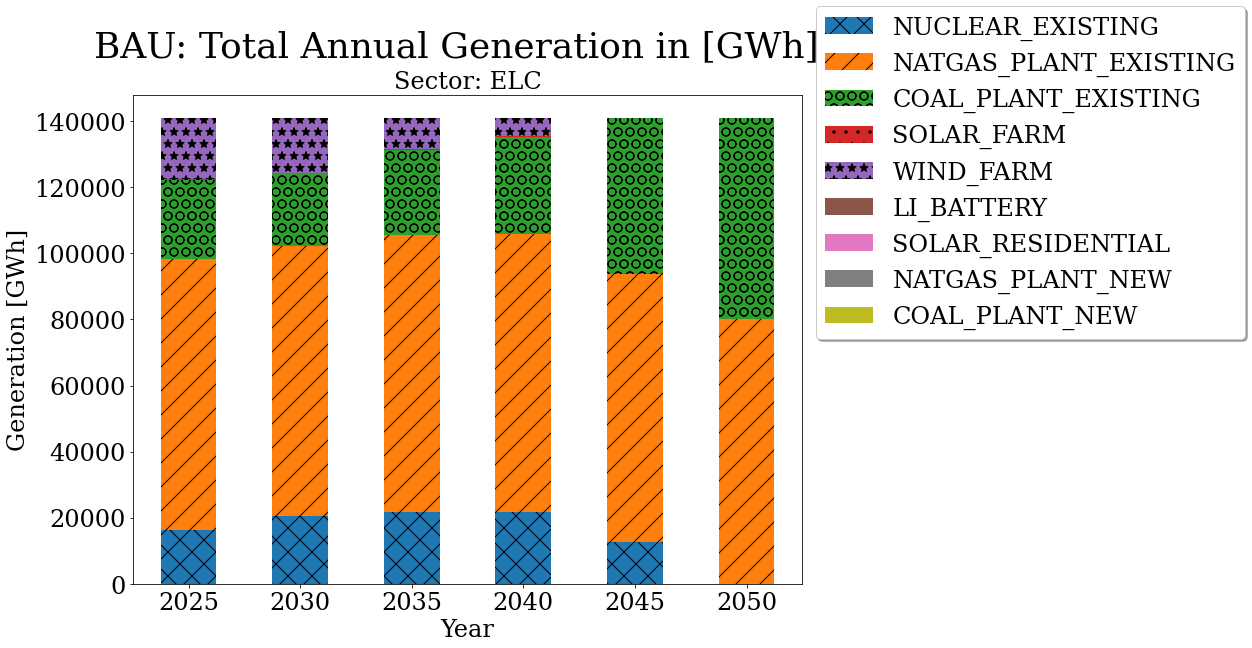

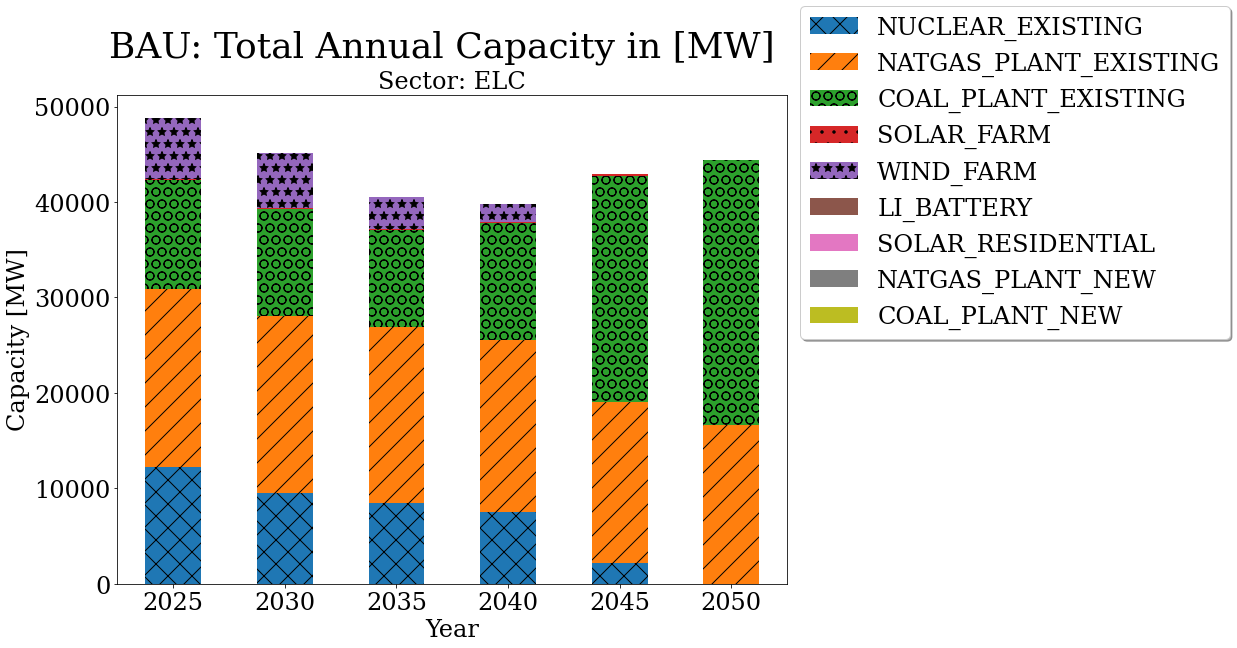

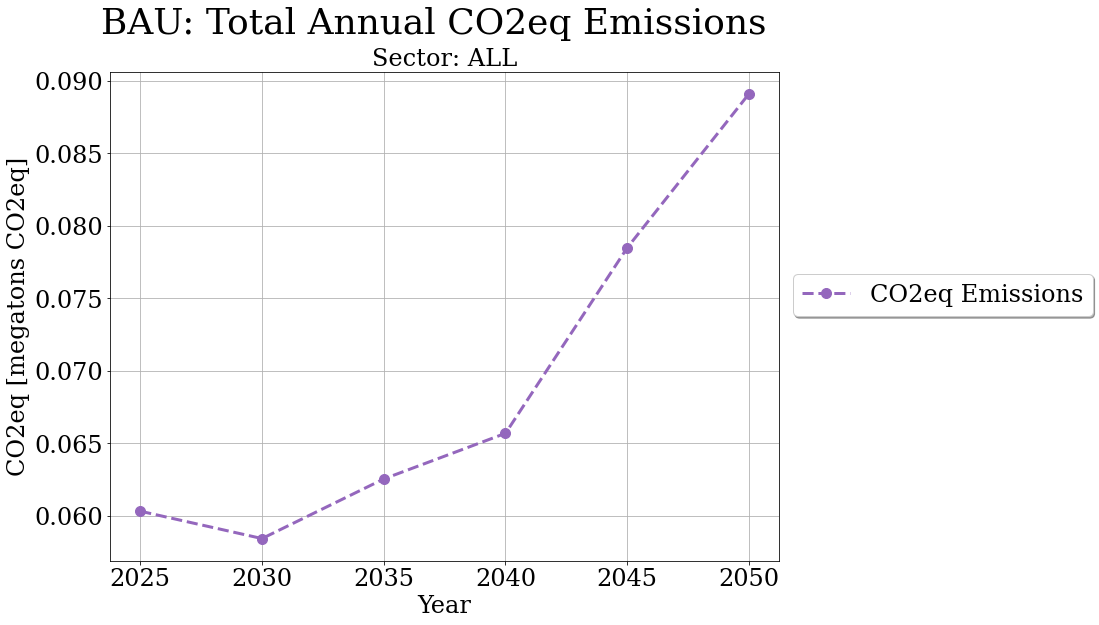

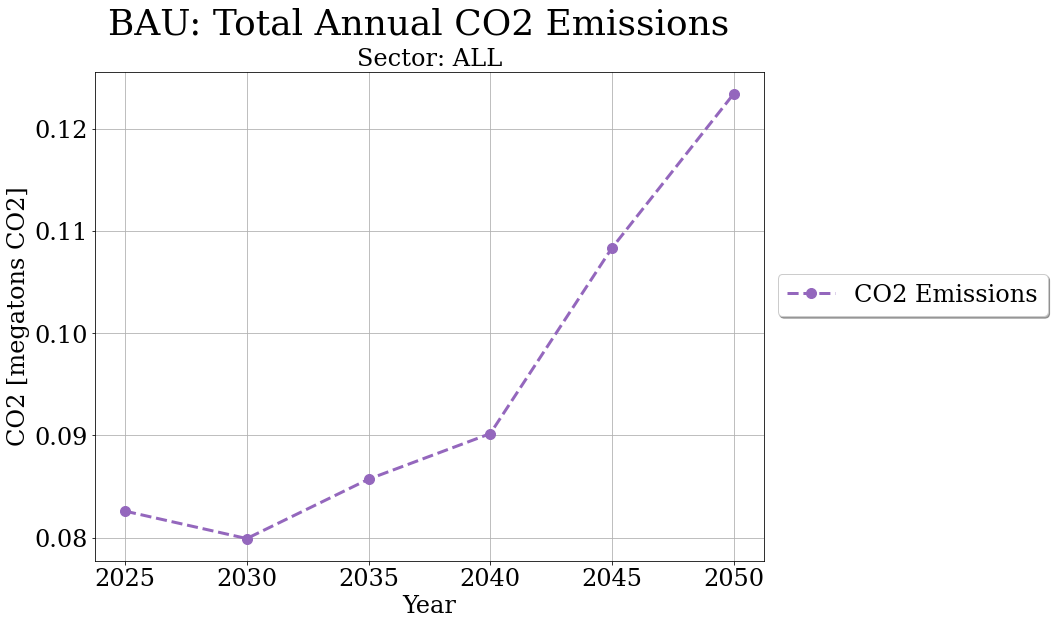

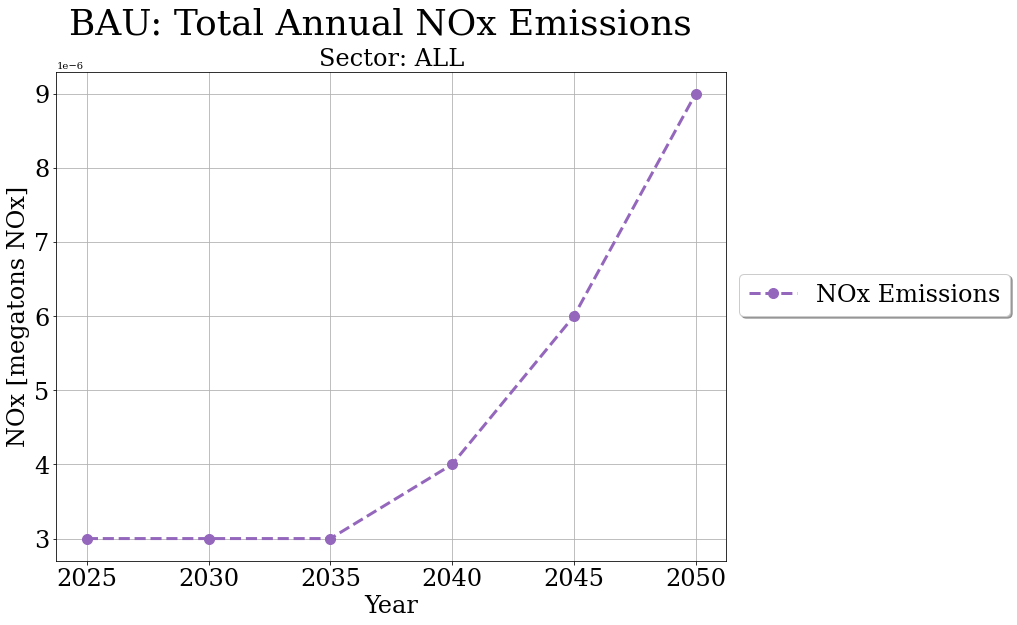

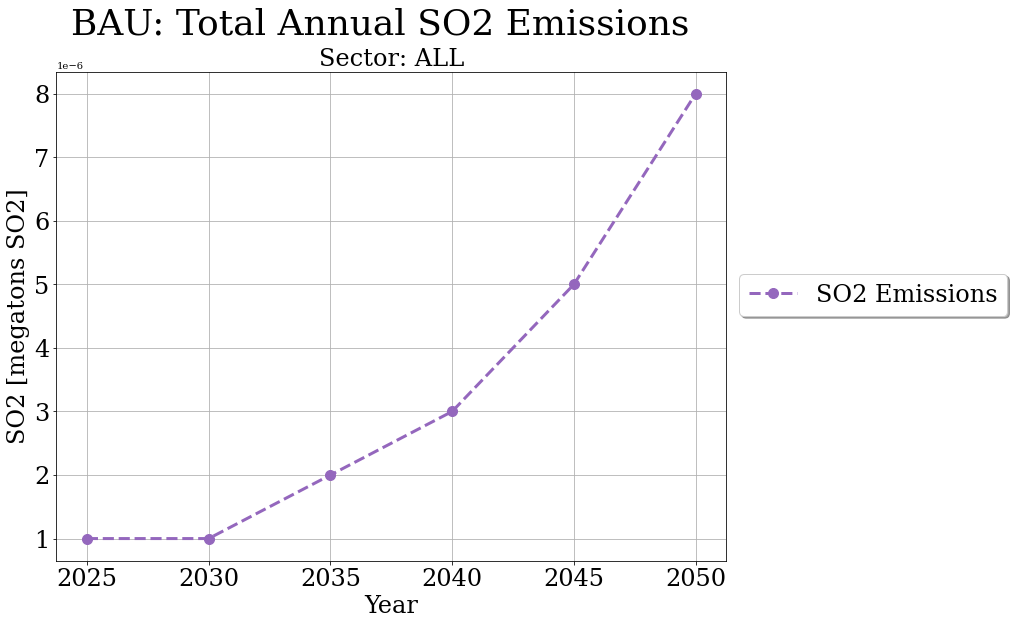

In [3]:
scenario = 'bau'
scenario_list = [f for f in file_list if scenario in f]
make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False)        

## Scenario: SD2

* Nuclear Plants Shutdown Prematurely
* There is no constraint on carbon emissions

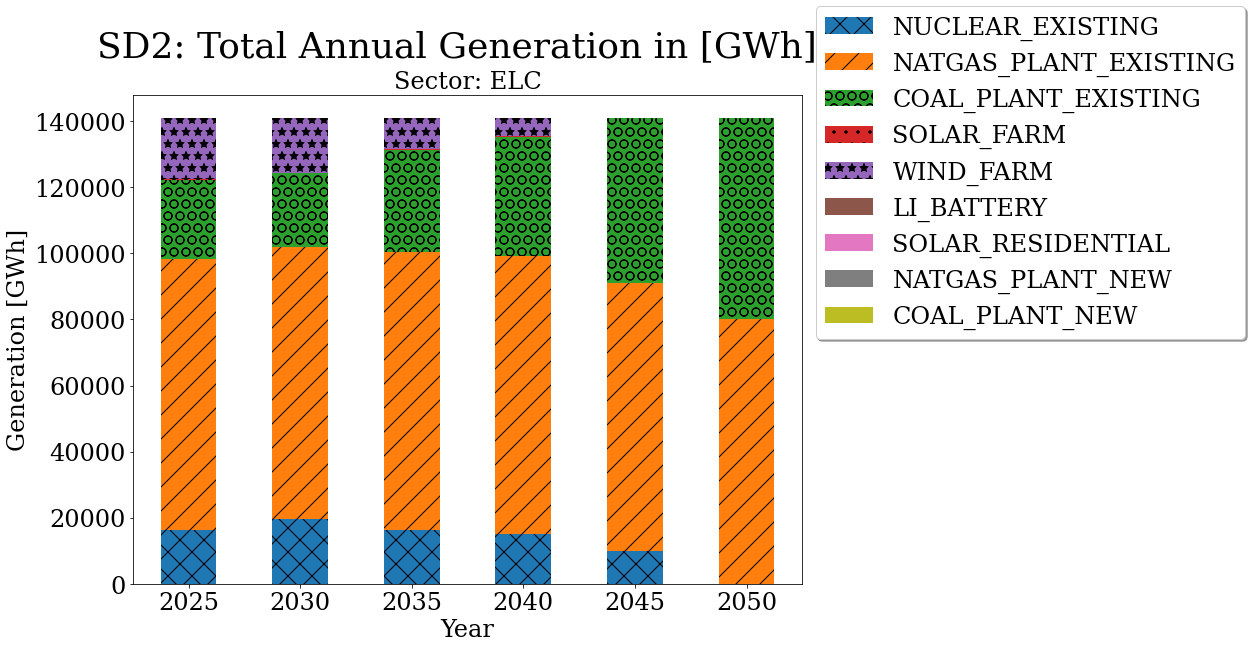

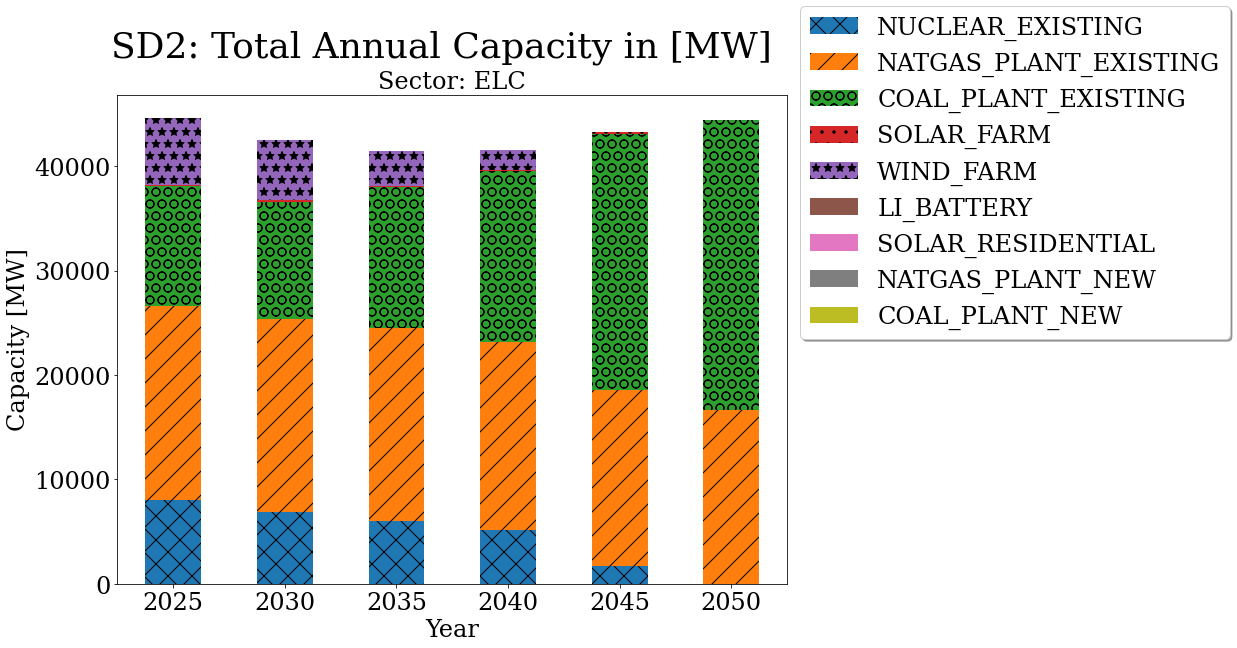

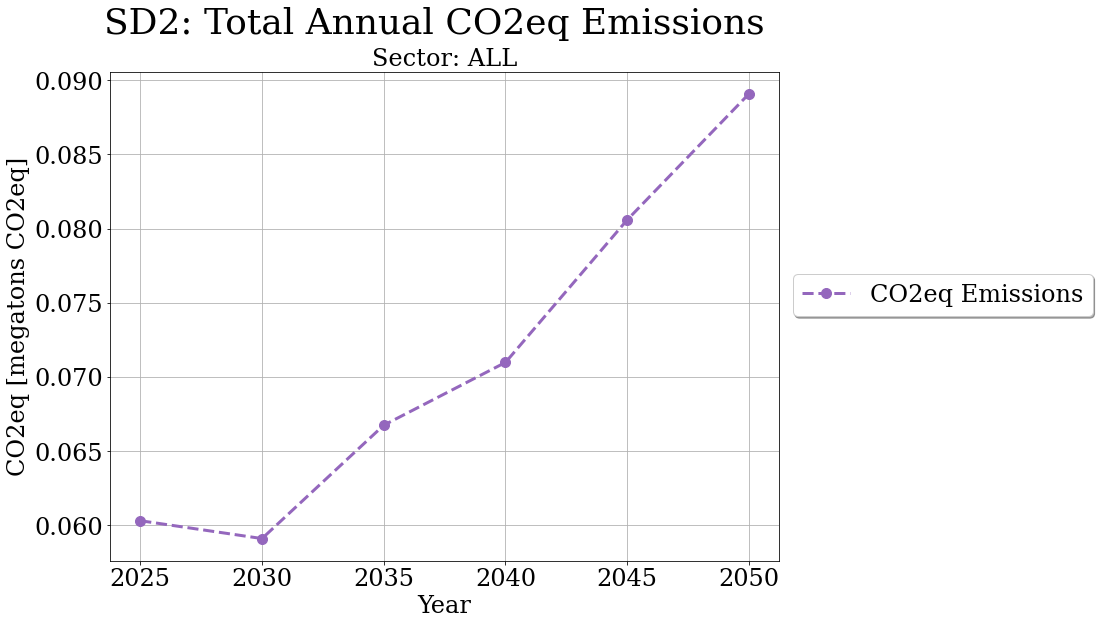

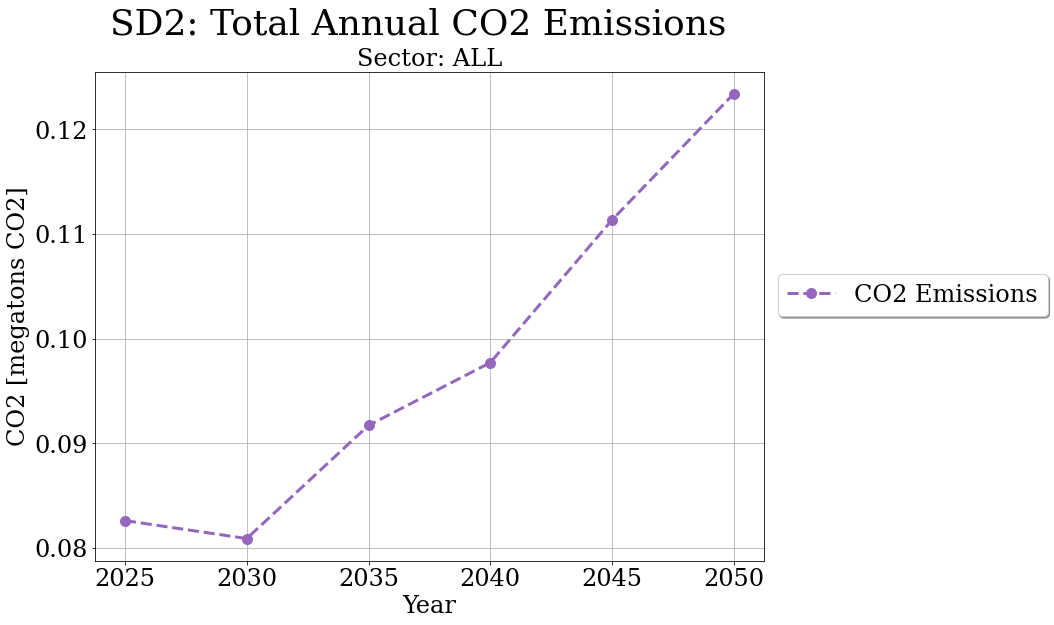

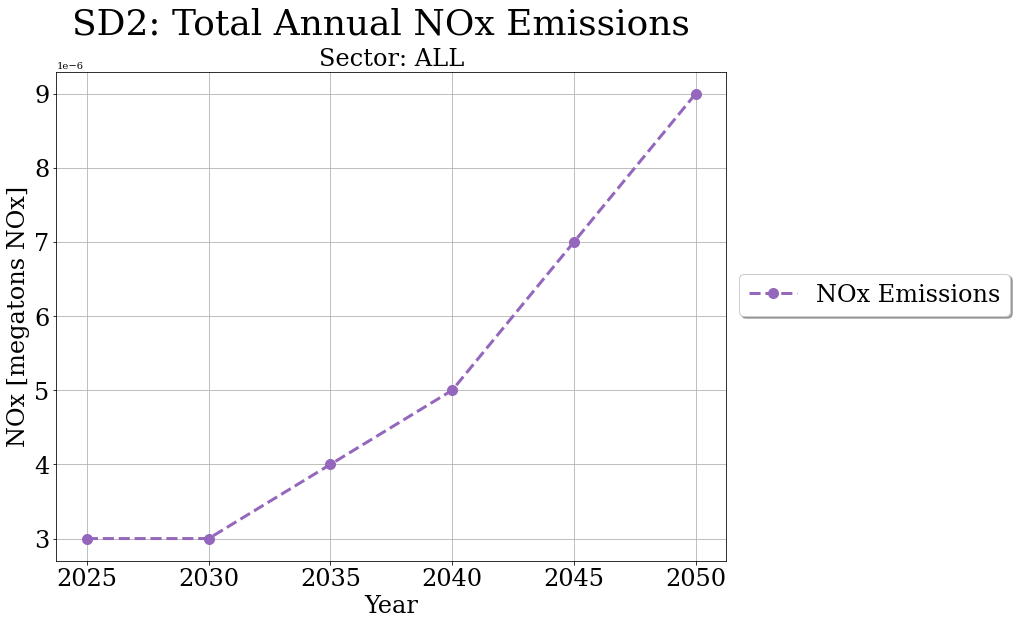

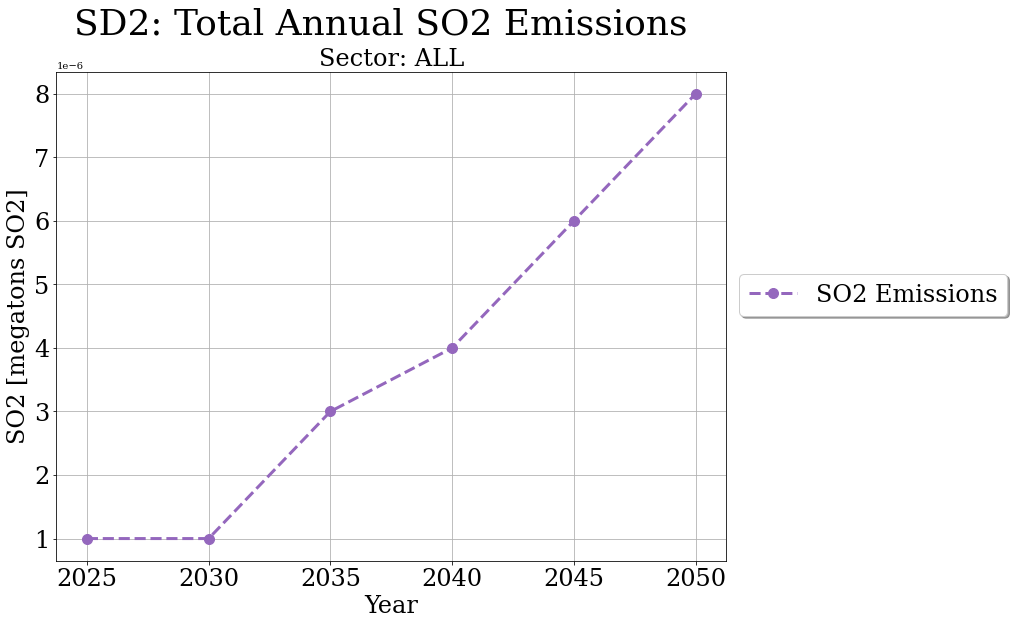

In [4]:
scenario = 'SD2'
scenario_list = [f for f in file_list if scenario in f]
make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False)  

## Scenario: SD3

* Nuclear plants shutdown prematurely 
* Zero carbon emissions allowed by 2030
* 100% renewable energy by 2050

Objective Function Values: 119265.34401 million dollars

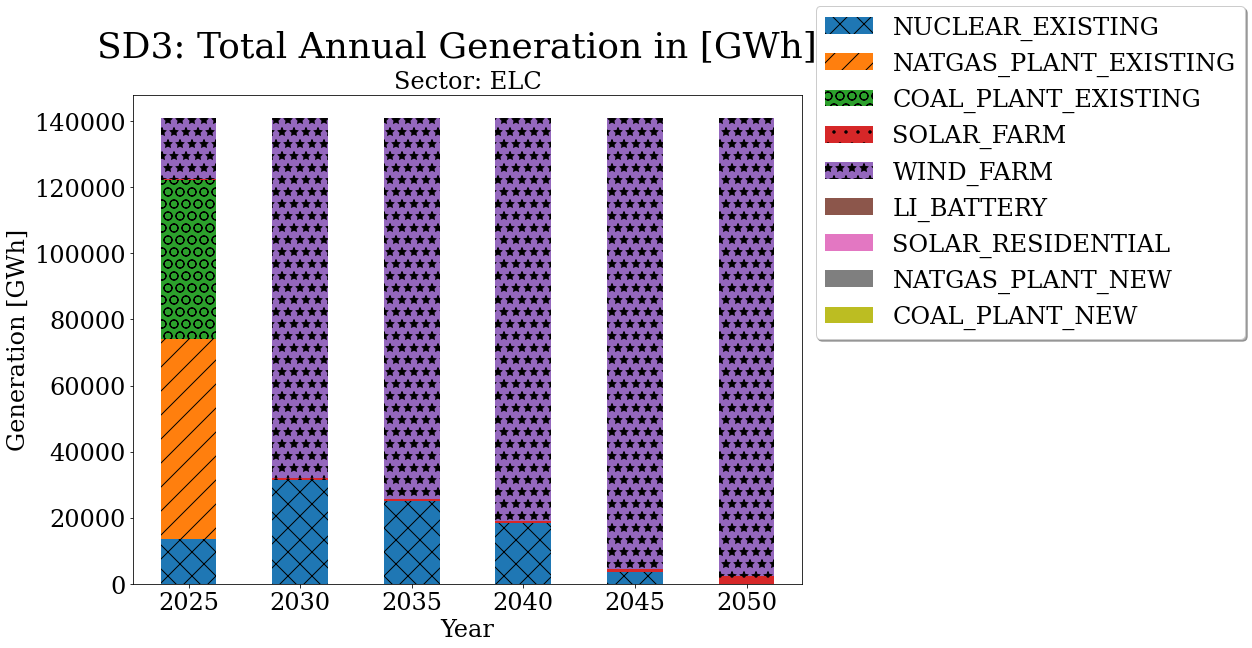

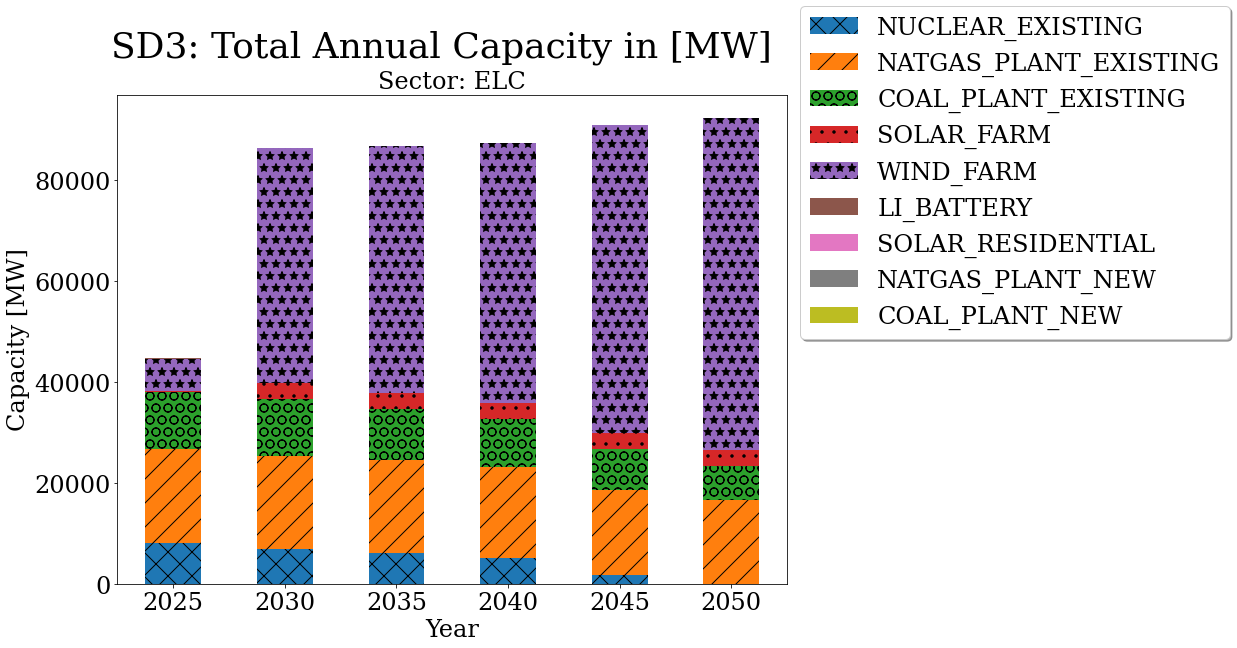

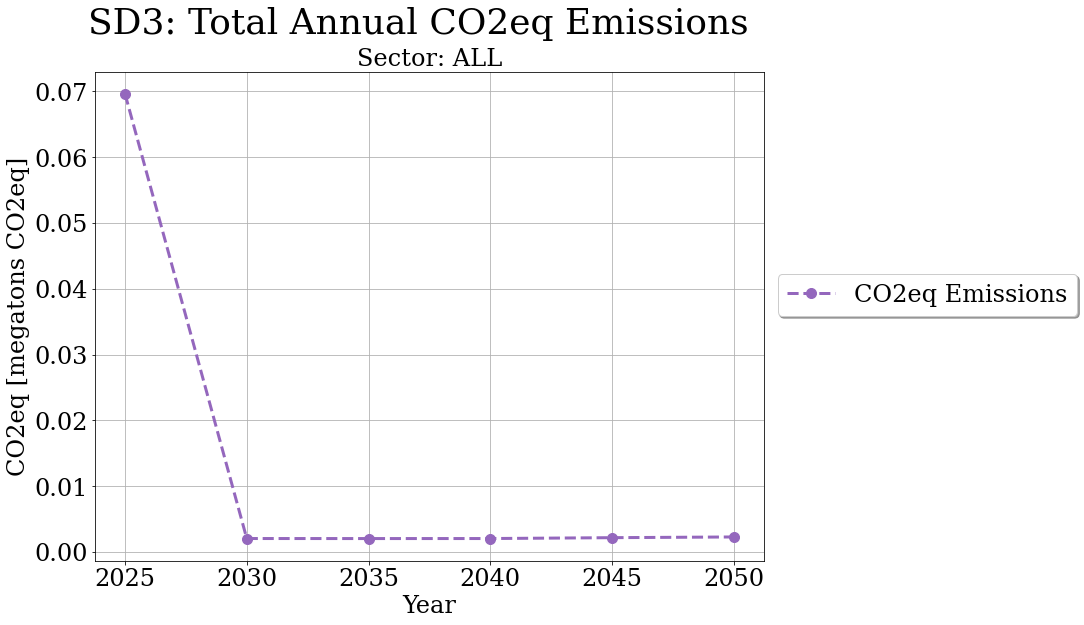

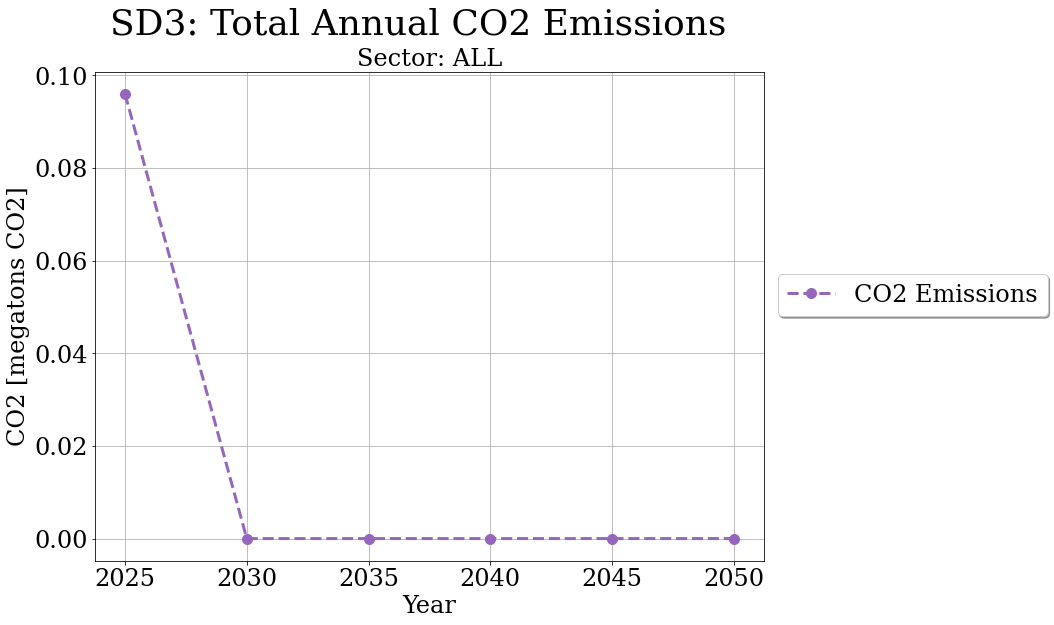

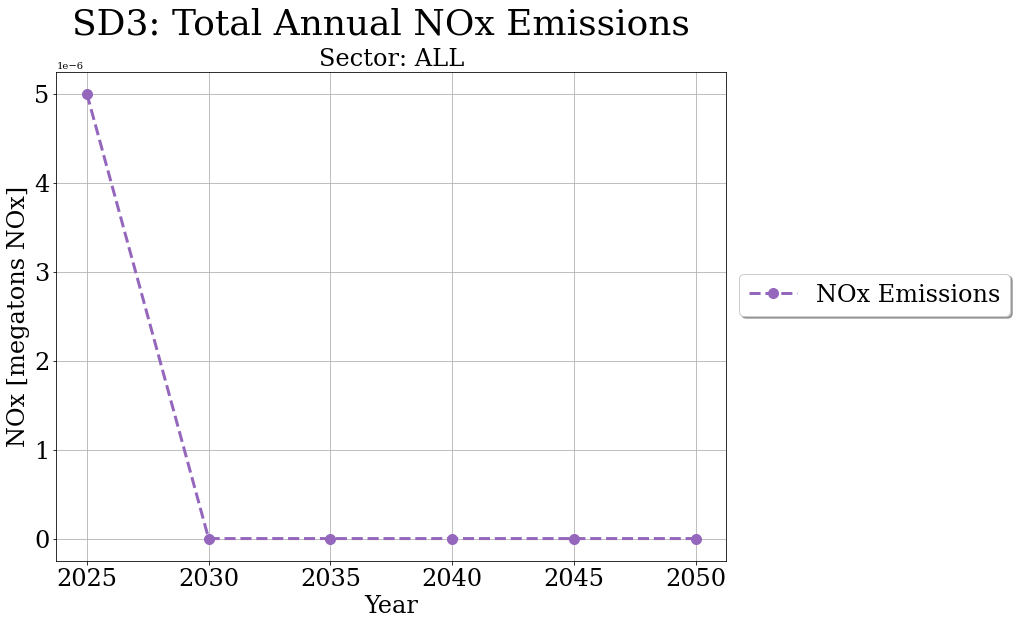

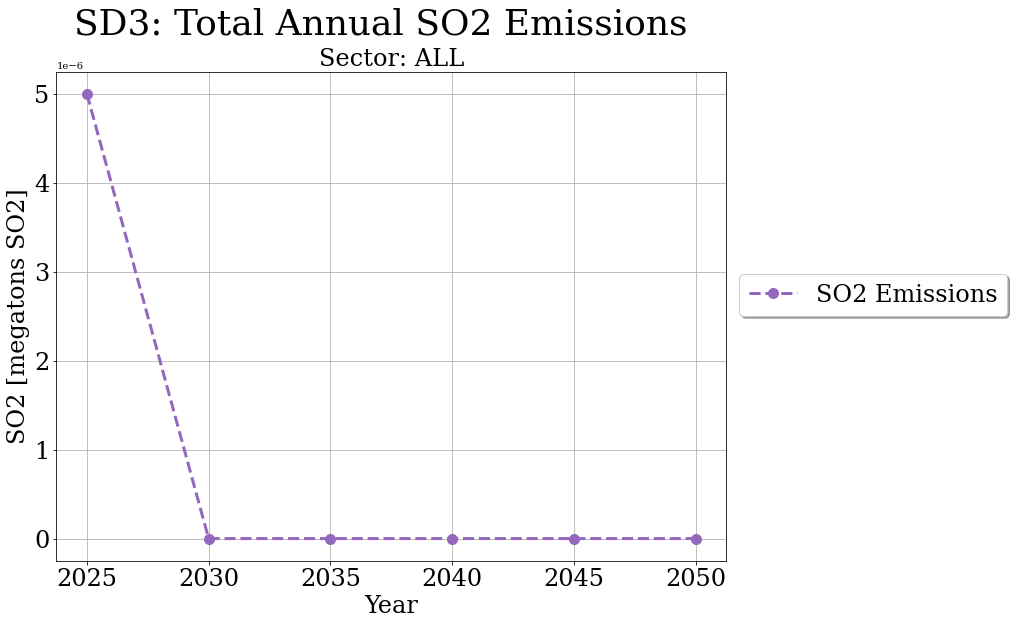

In [5]:
scenario = 'SD3'
scenario_list = [f for f in file_list if scenario in f]
make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False)  

## Scenario: SD4

* Nuclear is constrained by it's current maximum capacity. All plants could stay open. 
* Zero carbon emissions allowed by 2030

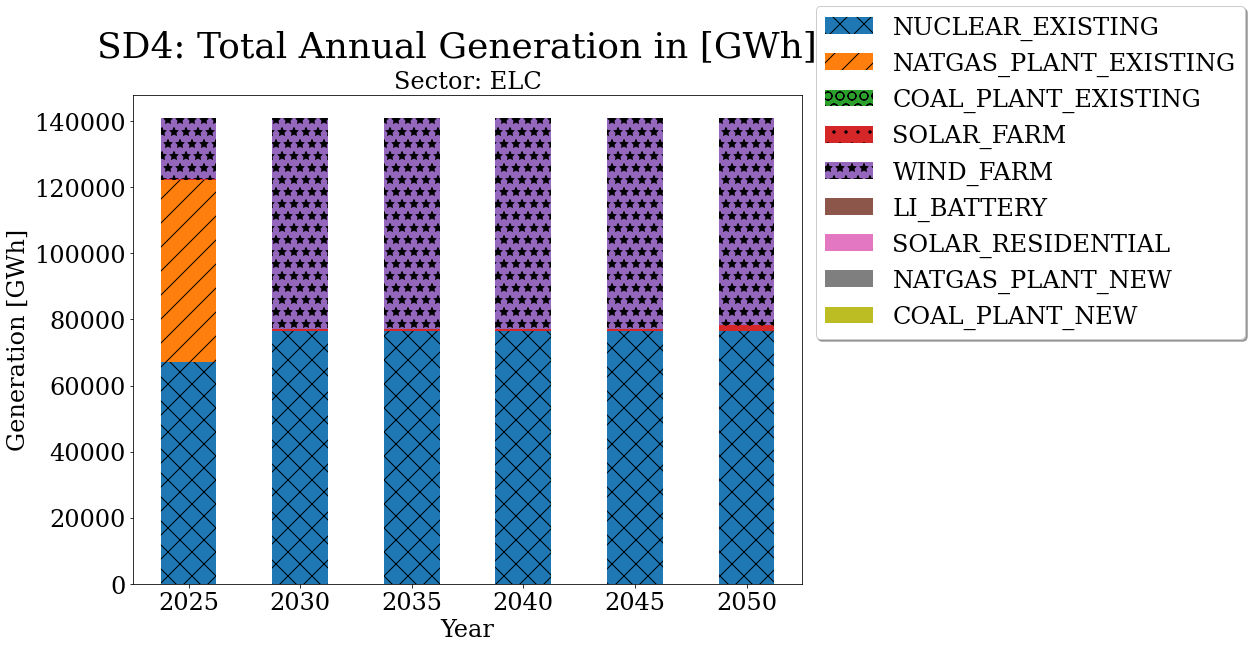

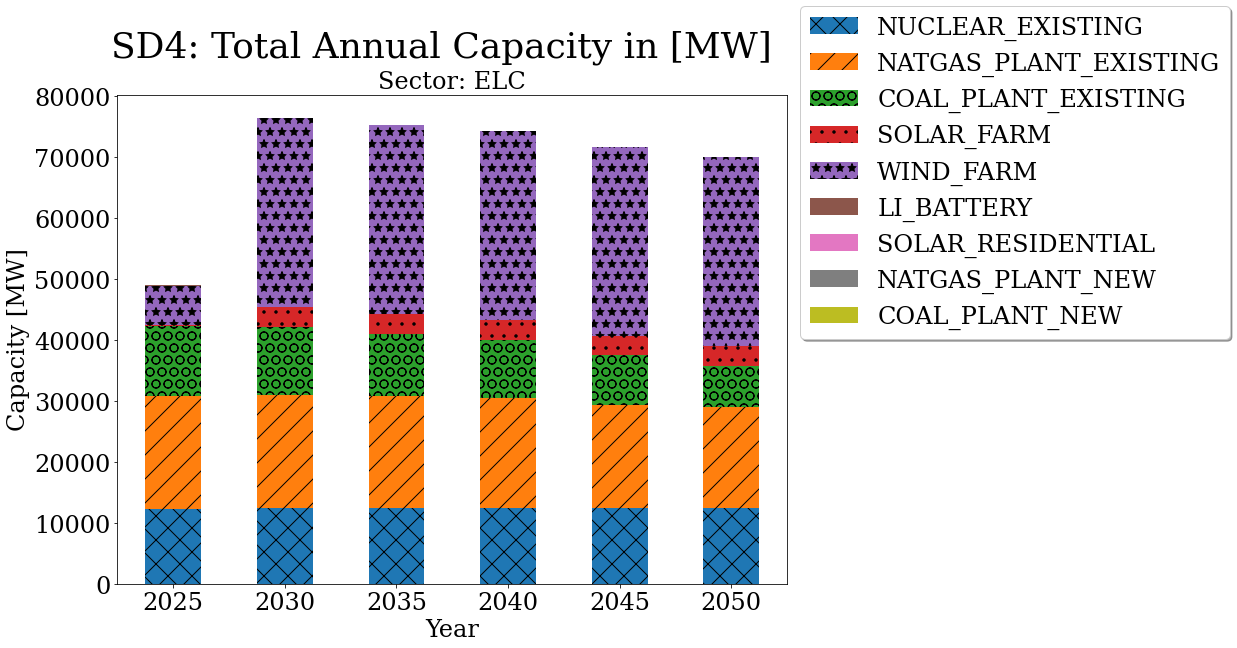

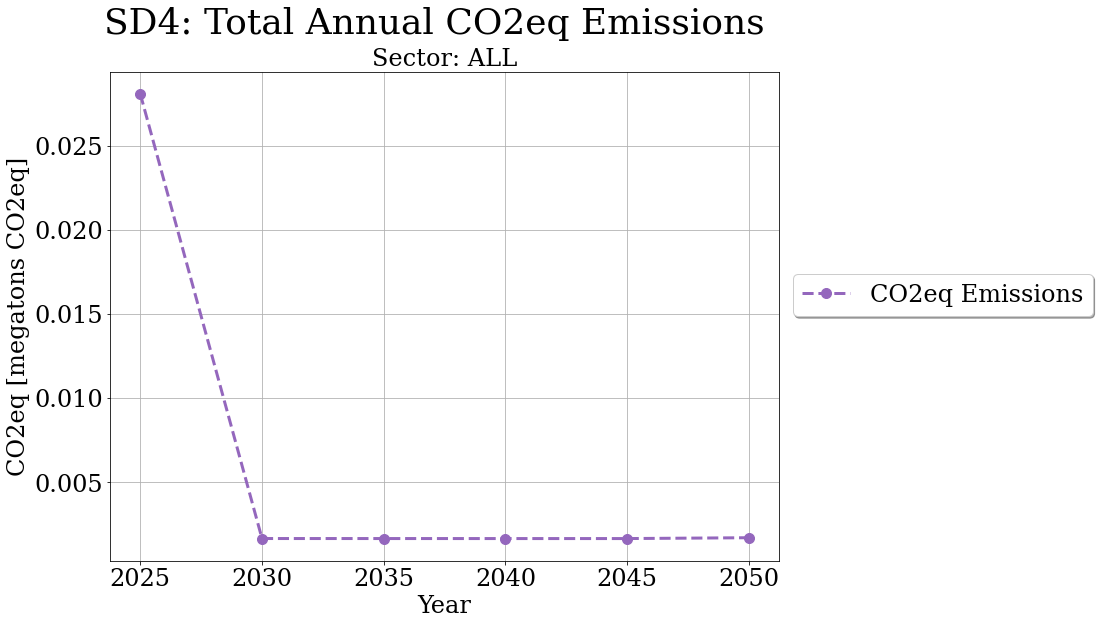

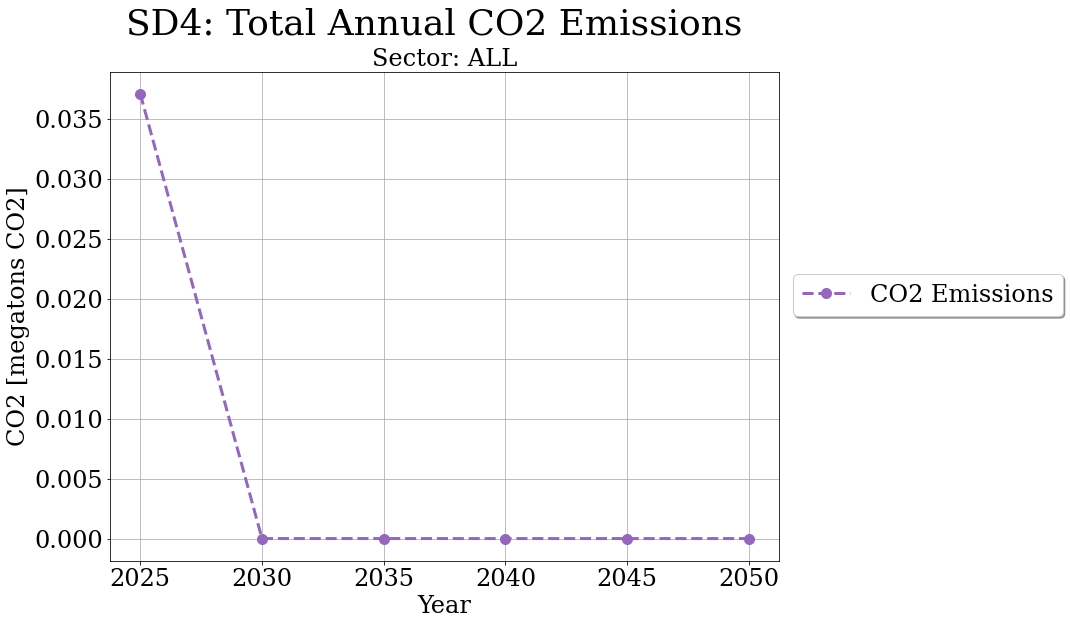

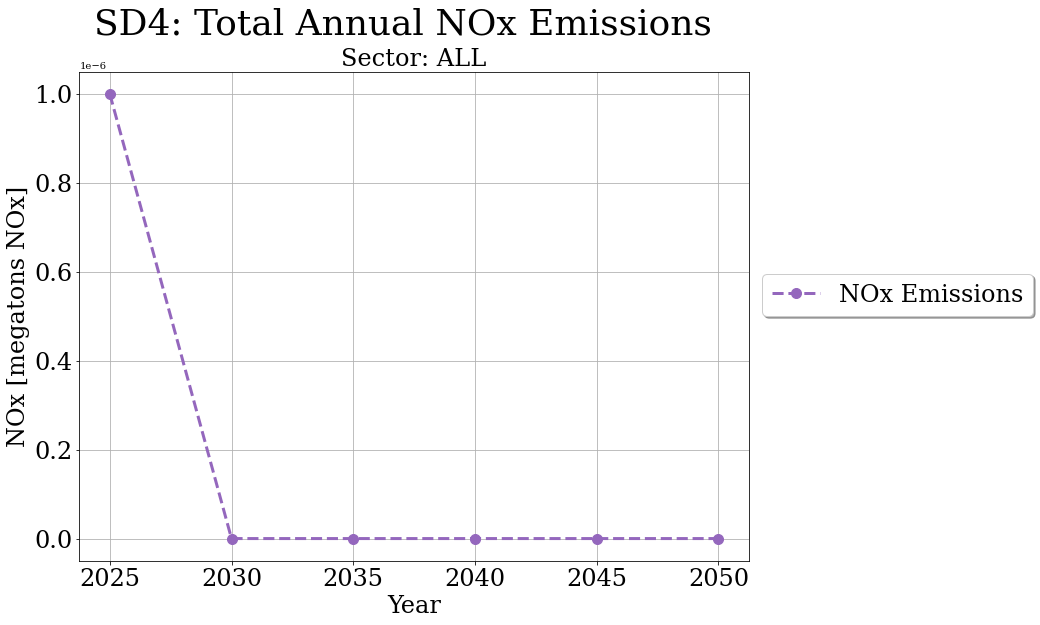

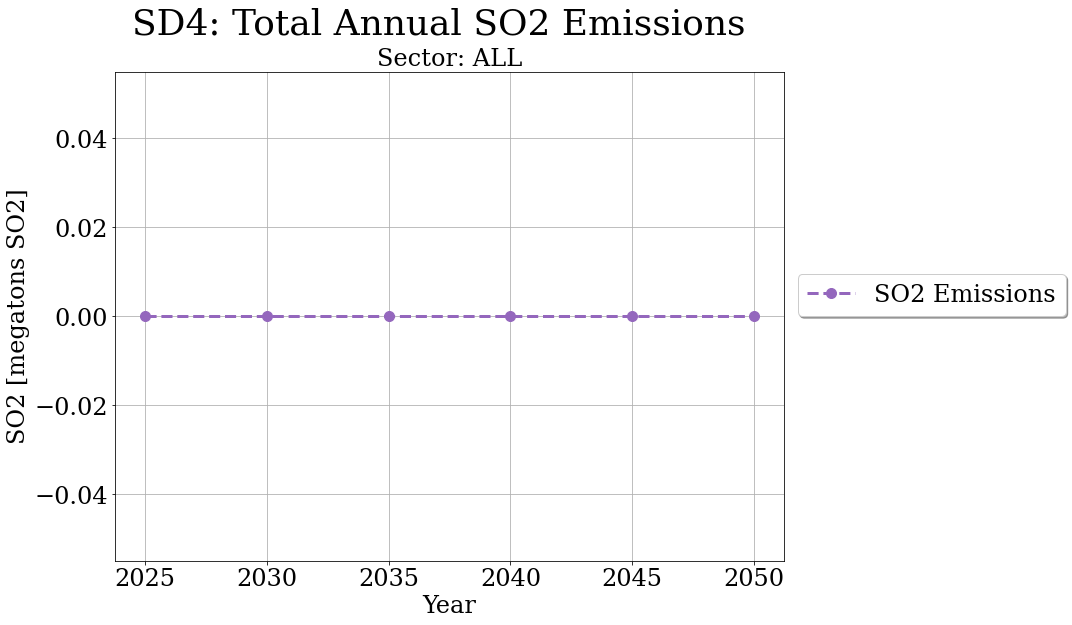

In [6]:
scenario = 'SD4'
scenario_list = [f for f in file_list if scenario in f]
make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False) 